## Comparing entry requirements for Computing courses at Scottish Universities

Scottish Universities which offer Computing courses have varied entry requirements. Requirements may see the student obtaining a set of grades and in particular subjects.

At university, the proportion of women enrolling in Undergraduate Computing related courses was approximately 18% in 2019/2020. The number of girls taking computing science at National 5, Higher, and Advanced Higher is lower than the number of boys. 

<h3>Question</h3>
<ul><li>Can girls gain a place on a Computing course at any of the Scottish Universities given they are they are less likely to take Computing and other typically male-dominated subjects at school?</li></ul>


<h3>The Data</h3>
Data was obtained by checking each university for computing courses. The <strong>standard entry</strong>, the <strong>minimum entry</strong>, and <strong>essential subjects</strong> for each course was recorded. Only entry into First Year was considered.

Entry requirements at Higher level were considered. It should be noted that most universities had additional requirements including:
<ul><li>Obtaining a set of grades within one year (typically S5)</li>
    <li>Passes in Maths at National 5</li>
    <li>Passes in English at National 5</li>
    </ul>
    
The URL for each course is included in the data.  

<h3>Comparing entry requirements</h3>
To compare the entry requirements the following scoring system was devised based on the level of grades and the number of grades required. 

Scoring system:
- 5 points per A grade
- 3 points per B grade
- 1 point per C grade
- 1 point per qualification
- 1 point per essential subject

<strong>Example:</strong> An entry requirement of AAAB would be 22 (15 points for the A's, 3 points for the B, 4 points for the number of qualifications). If the same entry requirement also required Maths and Computing, the new score would be 24.


<h2>Import libraries and data</h2>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_excel(r"https://github.com/kjp07/Women-In-STEM/blob/main/data/computing_entry_requirements_scotland.xlsx?raw=true")

In [4]:
df

,HE provider,Course title,Level of study,Standard entry (Highers),Essential subjects (SE),Grade in essential subject (SE),Minimum entry (Highers),Essential subjects (ME),Grade in essential subject (ME),URL
0,Abertay University,Computing,BSc (Hons),ABBB,"One of the following: Computer Science, Maths,...",NaN,BBB,"One of the following: Computer Science, Maths,...",NaN,https://www.abertay.ac.uk/course-search/underg...
1,Edinburgh Napier University,Computing,BEng/BEng (Hons),BBBC,NaN,NaN,CCCC,NaN,NaN,https://www.napier.ac.uk/courses/bengbeng-hons...
2,Edinburgh Napier University,Computing Science,BSc/BSc (Hons),BBBB,Maths or Physics,NaN,BBCC,Maths or Physics,B,https://www.napier.ac.uk/courses/bscbsc-hons-c...
3,Edinburgh Napier University,Data Science,BSc (Hons),BBBB,Maths or Physics,NaN,BBCC,Maths or Physics,B,https://www.napier.ac.uk/courses/bsc-hons-data...
4,Glasgow Caledonian University,Computing,BSc (Hons),BBBC,Maths or Computing,NaN,BBCC,Maths or Computing,NaN,https://www.gcu.ac.uk/study/courses/details/in...
5,Heriot-Watt University,Computing Science,BSc (Hons),ABBB,Maths,NaN,BBBC,Maths,B,https://www.hw.ac.uk/uk/study/undergraduate/co...
6,Heriot-Watt University,Computing Science (Data Science),BSc (Hons),ABBB,Maths,NaN,BBBC,Maths,B,https://www.hw.ac.uk/uk/study/undergraduate/co...
7,Robert Gorgon University,Computer Science,BSc (Hons),BBBC,NaN,NaN,BBC,NaN,NaN,https://www.rgu.ac.uk/study/courses/446-bsc-ho...
8,Robert Gorgon University,Computer Science,BSc (Hons),BBBC,NaN,NaN,BCCC,NaN,NaN,https://www.rgu.ac.uk/study/courses/446-bsc-ho...
9,The University of Edinburgh,Computer Science,BSc (Hons),AAAB,Maths,A,AABB,Maths,A,https://www.ed.ac.uk/studying/undergraduate/de...


<h2>Comparing entry requirements</h2>

Comparing standard and minimum entry requirements for computing courses offered by Scottish Universities.

In [11]:
# Long data
df_long = pd.melt(df, id_vars=["HE provider"], value_vars=["Standard entry (Highers)", "Minimum entry (Highers)"])

### Scoring standard entry requirements
# Define points per level of qualification
score_a = 5
score_b = 3
score_c = 1

# Define search variables
search_a = "A"
search_b = "B"
search_c = "C"

# Get count per variable, then multiple by score, then total 
df_long["count_a"] = df_long["value"].str.count(search_a, re.I)
df_long["score_a"] = df_long["count_a"] * score_a
df_long["count_b"] = df_long["value"].str.count(search_b, re.I)
df_long["score_b"] = df_long["count_b"] * score_b
df_long["count_c"] = df_long["value"].str.count(search_c, re.I)
df_long["score_c"] = df_long["count_c"] * score_c
df_long["qual_count"] = df_long["value"].str.len()
df_long["total_score"] = df_long["score_a"] + df_long["score_b"] + df_long["score_c"] + df_long["qual_count"]

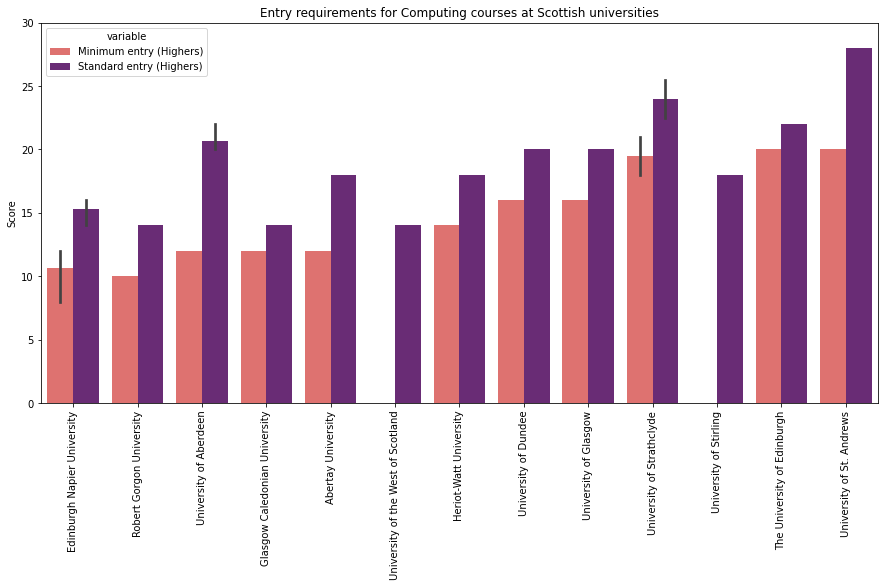

In [23]:
# Plot
plt.figure(figsize=(15, 7))
sns.barplot(x="HE provider", y="total_score", hue="variable", palette="magma_r", data=df_long.sort_values("total_score", ascending=True))
plt.xticks(rotation=90)
plt.ylabel("Score")
plt.xlabel("")
plt.ylim(0, 30)
plt.title("Entry requirements for Computing courses at Scottish universities")
plt.show()

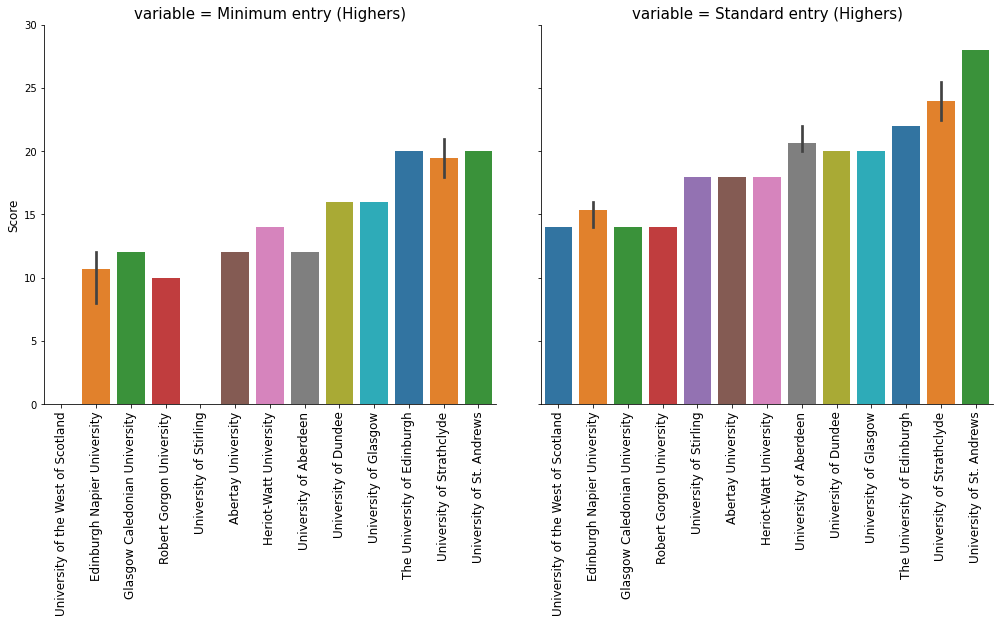

In [125]:
# Get order of university sorted by standard entry 
se = df_long[df_long["variable"] == "Standard entry (Highers)"].sort_values("total_score", ascending=True)
order_unis = se["HE provider"].unique()

# Plot
g = sns.catplot(x="HE provider", y="total_score", 
            col="variable", order=order_unis,
            data=df_long.sort_values("total_score", ascending=True),
           kind="bar", height=6, palette="tab10", aspect=1.25)
(g.set_xticklabels(rotation=90, size=12)
    .set_titles(size=15)
    .set(ylim=(0, 30))
    .set_axis_labels("", "Score", size=12))
plt.subplots_adjust(hspace=0.1, wspace=0.1);

<strong>Note:</strong> Some universities offer multiple computing courses hence why GCU, UoA, and UoS have had their score averaged.

<strong>Observations:</strong>
<ul>
    <li>The University of St. Andrews has the highest scoring standard entry requirement <strong>(28)</strong> and has one of the highest minimum entry requirement scores (20).</li>
    <li>University of the West of Scotland, Edinburgh Napier University, Glasgow Caledonian University, and Robert Gordon University have the lowest scoring standard entry requirements <strong>(14)</strong>.</li>
    <li>Edinurgh Napier University has the lowest scoring minimum entry requirement <strong>(8)</strong>, followed by Robert Gordon University</li>
    <li>University of St. Andrews
    </ul>

<h2>Average entry scores and subjects required or recommended for entry</h2>

In [124]:
# Average standard entry requirement score
average_se = round(se["total_score"].mean(), 0)

# Average minimum entry requirement score
me = df_long[df_long["variable"] == "Minimum entry (Highers)"].sort_values("total_score", ascending=True)
average_me = round(me["total_score"].mean(), 0)

print("Average standard entry requirement:", average_se)
print("Average minimum entry requirement:", average_me)

Average standard entry requirement: 20.0
Average minimum entry requirement: 15.0


In [128]:
# Count of "Math" in Essential subjects (SE)
print("Number of courses:", len(df.index))

# Count of "Math" in Essential subjects (SE)
print("Number of courses asking for/recommending Maths:", len(df[df["Essential subjects (SE)"].str.contains("Math", na=False)]))

# Count of "Physics" in Essential subjects (SE)
print("Number of courses asking for/recommending Physics:", len(df[df["Essential subjects (SE)"].str.contains("Physics", na=False)]))

# Count of "Comp" in Essential subjects (SE)
print("Number of courses asking for/recommending Computing:", len(df[df["Essential subjects (SE)"].str.contains("Comp", na=False)]))

Number of courses: 25
Number of courses asking for/recommending Maths: 19
Number of courses asking for/recommending Physics: 7
Number of courses asking for/recommending Computing: 11


In [131]:
# Essential and recommended subjects
print(df["Essential subjects (SE)"].unique())

['One of the following: Computer Science, Maths, Architectural Technology, Human Biology, Biology, Building Construction, Chemistry, Engineering Science, Environmental Science, Geography or Physics'
 nan 'Maths or Physics' 'Maths or Computing' 'Maths'
 'Good performance in at least two Maths/Science subjects'
 'Maths and (Physics or Engineering Science)'
 'Maths and a science subject (Information Technology, Mathematics, Chemistry, Biology, Human Biology, Physics, Psychology or Computing Science)'
 'Maths and Computing'
 'Mathematics and a pass in one of the following: Biology (or Human Biology), Chemistry, Computing Science, Geography, Physics, Psychology.'
 'Maths (Computing Science recommended)']


<strong>Observations/thoughts:</strong>
<ul><li>The average standard entry requirement score is 20. This could be made up of different grades and a different number of qualifications. Based on the scoring system, the following scores may be considered "average":
    <ul><li>AABB <i>(A: 2 x 5 = 10, B: 2 x 3 = 6, number of qualifications: 4)</i></li>
        <li>AAAC <i>(A: 3 x 5 = 15, C: 1, number of qualifications: 4)</i></li>
        <li>ABBBC <i>(A: 1, B: 3 x 3 = 9, C: 1, number of qualifications: 5)</i></li>
        <li>BBBBB <i>(B: 5 x 3 = 15, number of qualificiations: 5)</i></li>
    </ul>
    <li>The average minimum entry requirement score is 15. Similar to above, this could be made up of different grades and different numbers of qualifications.</li>
    <li>Most courses ask for Higher Maths, with some specifying the grade (E.g., the University of St. Andrews and the University of Edinburgh ask for A at Maths, University of Strathclyde asks for a B). With this in mind, this could knock the "average" grades above if Maths wasn't achieved at those grades.</li>
    <li>11 out of 25 courses ask or recommend Computing be included.</li>
    <li>A couple of Scottish Universities also consider qualifications in other subjects including Biology, Chemistry, and Psychology (subjects which have a greater proportion of girls and women at school and university).</li>
    </ul>

<h2>Analysis and Conclusions</h2>

Girls consistently outperform boys at Higher subjects <strong>(<a href="https://www.gov.scot/news/breaking-down-gender-barriers-in-the-classroom/">Breaking down gender barriers in the classroom, 2021)</a></strong>. However, there is a gender imbalance at school level which could affect the gender distribution at university courses. Boys outnumber girls in computing, physics, and similar male-dominated subjects at school. Meanwhile, girls are more likely to take subjects such as art and design, health and food technology, and childcare and development. Computing and Physics are two of the subjects specifically asked for by some Scottish Universities.

Women only made up 18% of enrollments in Computing subjects in 2019/2020. Could entry requirements such as specifying essential subjects and high grades be preventing young women from choosing Computing? If a boy and girl with an A grade in Maths applied for the same Computing course, but the boy also had a Higher Computing qualification, would the boys have an advatange? 

Therefore, subjects asides, girls could apply for and be successful in gaining a place on a Computing undergraduate degree. There must be other reasons why they may not apply to computing including:
- Not being exposed to computing at school 
- Despite having relevant skills from other subjects, there is no link to computing
- Not being encouraged to pursue computing/tech when applying to universities
- Viewing it as a difficult subject even though they enjoy it
- Viewing it as a male-dominated subject

<h2>Final thoughts</h2>
<ul><li>Computing courses at Scottish Universities have varied entry requirements</li>
    <li>The majority of Scottish universities ask for Higher Maths and many ask for or recommend Computing or Physics</li>
    <li>Some Scottish Universities recognise that other subjects (i.e., not Maths/Computing/Physics) can have relevant skills for their courses</li>
    <li>The difference between the "average" standard and minimum entry requirements may not be significant enough to sway girls to apply if they don't meet the standard requirements (women are more likely to only apply to jobs if they meet 100% of the requirements, could the same be said for university applications?)</li>
    </ul>
    
<h2>Future ideas</h2>
<ul><li>Comparing entry requirements of other subjects (e.g., female dominated subjects such as vetinary medicine, education and teaching)</li>
    <li>Are university course descriptions for computing and related subjects gendered?</li>
</ul>
    